In [24]:
import numpy as np
import pymc3 as pm

import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
from plot_functions import adjustAxeProperties

In [6]:
true_mu = 1.0
true_sd = 0.05
n_obs = 20

np.random.seed(1234)
data = np.random.normal(loc=true_mu, scale=true_sd, size=n_obs)

# Case 1, assuming sd is pre-specified

In [9]:
assumed_sd = 0.1

BURN_IN_STEPS = 500
MCMC_STEPS = 2000
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=-10, upper=10) 
    center = pm.Normal('obs', mu=mu, sd=assumed_sd, observed=data)
    start_MAP = pm.find_MAP()
    trace = pm.sample(BURN_IN_STEPS+MCMC_STEPS, start=start_MAP, step=pm.NUTS())
    trace = trace[BURN_IN_STEPS:]    

logp = -977.08, ||grad|| = 9,994.4: 100%|██████████| 7/7 [00:00<00:00, 1095.49it/s]
100%|██████████| 4500/4500 [00:02<00:00, 1814.52it/s]


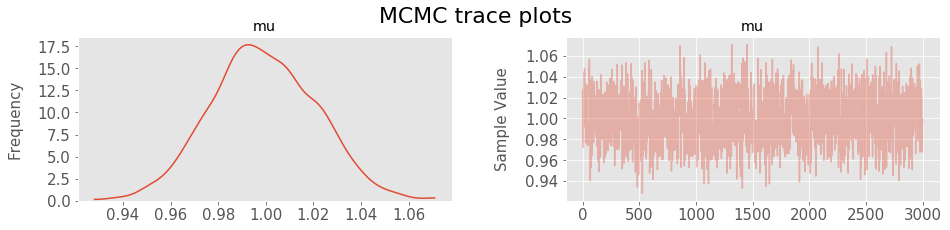

In [18]:
FONTSIZE = 15
axes = pm.traceplot(trace, varnames=['mu'], figsize=(13, 3))

adjustAxeProperties(axes[0, 0], FONTSIZE, 0, FONTSIZE, 0)    
axes[0, 0].set_ylabel('Frequency', fontsize=FONTSIZE, labelpad=15)

adjustAxeProperties(axes[0, 1], FONTSIZE, 0, FONTSIZE, 0)    
axes[0, 1].set_ylabel('Sample Value', fontsize=FONTSIZE, labelpad=15)

st = plt.suptitle('MCMC trace plots', fontsize=22)
plt.tight_layout(pad=0, w_pad=4, h_pad=4)
st.set_y(1.0)
plt.subplots_adjust(top=0.86)

In [62]:
posterior_predictive = pm.sample_ppc(trace, model=model, samples=1000, progressbar=False)
posterior_predictive['obs'].shape
ppc_median = np.median(posterior_predictive['obs'])
data_median = np.median(data)

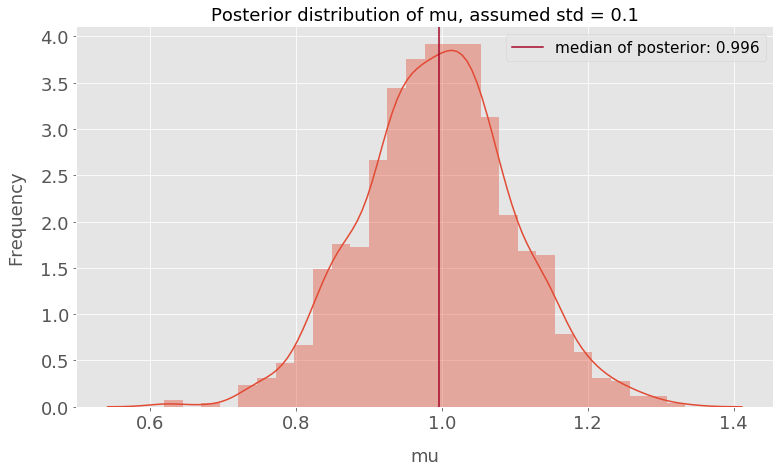

In [72]:
FONTSIZE = 18
fig, ax = plt.subplots(1, figsize=(12.5, 7))
ax = sbn.distplot(posterior_predictive['obs'])
ax.set_xlabel('mu', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('Frequency', fontsize=FONTSIZE, labelpad=15)
ax.axvline(ppc_median, ls='-', color="#A60628", label='median of posterior: {0:.3f}'.format(ppc_median))
#ax.axvline(data_median, ls='--', color='k', label='median of observation: {0:.3f}'.format(data_median))
adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
ax.legend(loc=1, fontsize=FONTSIZE*0.85)

_ = ax.set_title('Posterior distribution of mu, assumed std = {0:}'.format(assumed_sd), fontsize=FONTSIZE)

# case 2, use a prior to estimate sigma

In [73]:
BURN_IN_STEPS = 1000
MCMC_STEPS = 3000
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=-10, upper=10) 
    sd = pm.HalfCauchy('sigma', beta=10, testval=1.0)   
    center = pm.Normal('obs', mu=mu, sd=sd, observed=data)
    start_MAP = pm.find_MAP()
    trace = pm.sample(BURN_IN_STEPS+MCMC_STEPS, start=start_MAP, step=pm.NUTS())
    trace = trace[BURN_IN_STEPS:]    

logp = 24.31, ||grad|| = 124.44: 100%|██████████| 26/26 [00:00<00:00, 2666.18it/s]    
100%|██████████| 4500/4500 [00:03<00:00, 1254.41it/s]


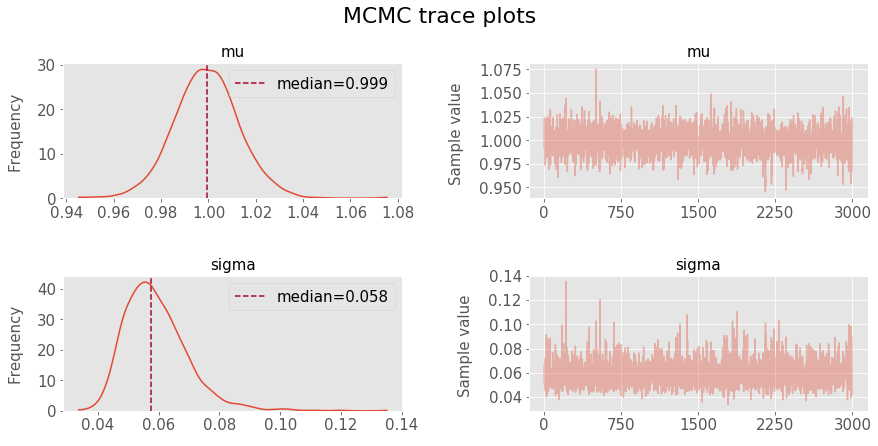

In [83]:
FONTSIZE = 15

varnames = ['mu', 'sigma']
axes = pm.traceplot(trace, varnames=varnames, figsize=(12, 6))

for i, varname in enumerate(varnames):
    adjustAxeProperties(axes[i, 0], FONTSIZE, 0, FONTSIZE, 0)    
    axes[i, 0].set_xlabel(' ', fontsize=0, labelpad=5)
    axes[i, 0].set_ylabel('Frequency', fontsize=FONTSIZE, labelpad=15)
    axes[i, 0].set_title(varnames[i], fontsize=FONTSIZE)
    axes[i, 0].axvline(np.median(trace[varname]), ls='--', color="#A60628", label='median={0:.3f}'.format(np.median(trace[varname])))
    axes[i, 0].legend(loc='best', fontsize=FONTSIZE)
    
    adjustAxeProperties(axes[i, 1], FONTSIZE, 0, FONTSIZE, 0)    
    axes[i, 1].set_xlabel(' ', fontsize=0, labelpad=5)
    axes[i, 1].set_ylabel('Sample value ', fontsize=15, labelpad=15)
    axes[i, 1].set_xticks(np.linspace(0, MCMC_STEPS, 5))
    axes[i, 1].set_title(varnames[i], fontsize=15)

st = plt.suptitle('MCMC trace plots', fontsize=22)
plt.tight_layout(pad=0, w_pad=4, h_pad=4)
st.set_y(1.0)
plt.subplots_adjust(top=0.87)
